In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Decision Tree Regression

In [3]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

In [4]:
data = pd.read_csv("bank-data.csv")
data.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,0,1,0,0,0,0,1
1,ID12102,40,MALE,TOWN,30085.1,1,3,1,0,1,1,0
2,ID12103,51,FEMALE,INNER_CITY,16575.4,1,0,1,1,1,0,0
3,ID12104,23,FEMALE,TOWN,20375.4,1,3,0,0,1,0,0
4,ID12105,57,FEMALE,RURAL,50576.3,1,0,0,1,0,0,0


In [5]:
data_new = data.drop('id',1)
data_new = data_new.drop('sex',1)
data_new = data_new.drop('region',1)
data_new = data_new.drop('income',1)
y = data.income
data_new.head()

,age,married,children,car,save_act,current_act,mortgage,pep
0,48,0,1,0,0,0,0,1
1,40,1,3,1,0,1,1,0
2,51,1,0,1,1,1,0,0
3,23,1,3,0,0,1,0,0
4,57,1,0,0,1,0,0,0


In [6]:
regression_tree = tree.DecisionTreeRegressor(criterion='mse',max_depth = 3, min_samples_split=30, min_samples_leaf=10,random_state=100)
regression_tree.fit(data_new,y)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=10, min_samples_split=30,
                      random_state=100)

In [27]:
#shuffle = embarralhar
crossvalidation = KFold(n_splits=5,shuffle=True, random_state=1)
score = np.mean(cross_val_score(regression_tree,data_new,y,scoring='neg_mean_squared_error',cv=crossvalidation, n_jobs=1))
print('Mean squared error: %.3f' % abs(score))
score = np.mean(cross_val_score(regression_tree,data_new,y,scoring='neg_mean_absolute_error',cv=crossvalidation, n_jobs=1))
print('Mean absolute error: %.3f' % abs(score))

Mean squared error: 74501390.406
Mean absolute error: 6884.014


In [28]:
#Visualization
#pip install graphviz -- for windows: conda install -c anaconda graphviz -- restart machine
#pip install pydotplus

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from pydotplus.graphviz import graph_from_dot_data

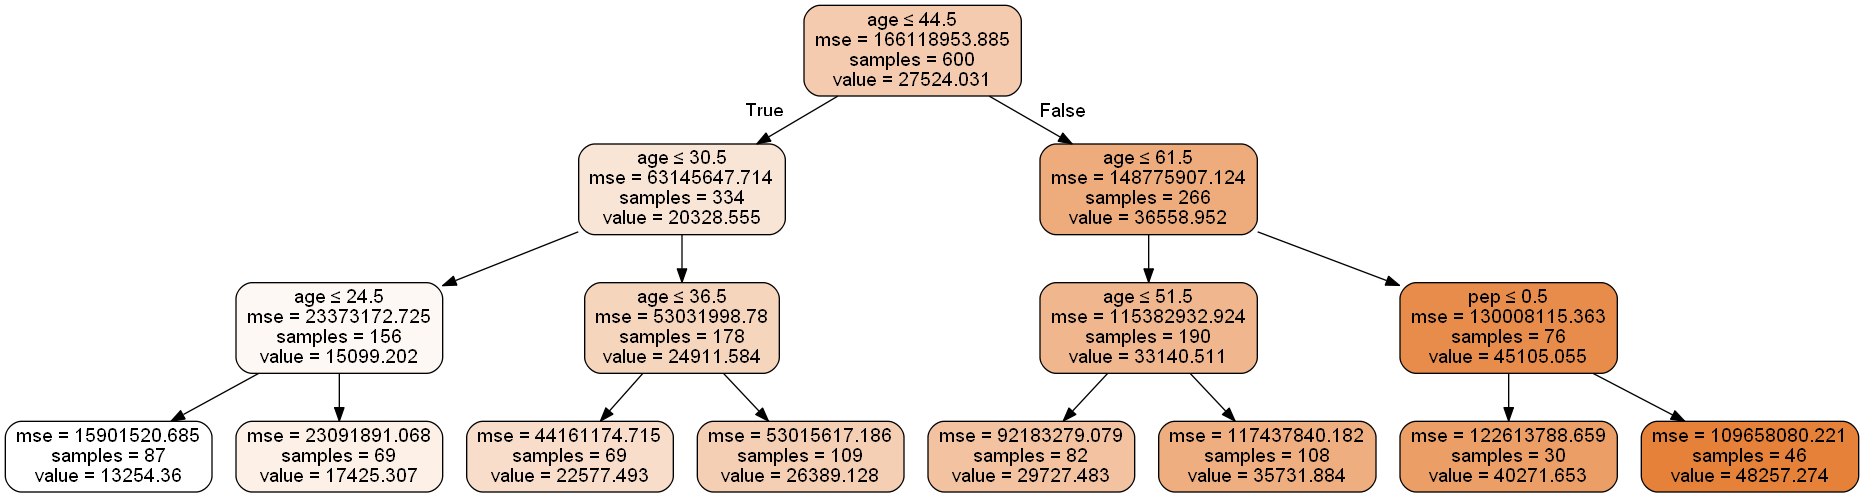

In [29]:
dot_data = StringIO()

#export_graphviz(regression_tree, out_file=dot_data,filled=True, rounded=True, special_characters=True)
export_graphviz(regression_tree, 
                out_file=dot_data,
                filled=True, 
                rounded=True, 
                feature_names=['age','married','children','car','save_act','current_act','mortgage','pep'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#graph = graph_from_dot_data(dot_data)                 # Create graph from dot data
#graph.write_png('tree.png')                           # Write graph to PNG image